In [439]:
# to load, access, process and dump json files
import json
# regular repression
import re
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [440]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [819]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
print('No. of rows and columns :', df.shape)
# show first few rows
df.head()

No. of rows and columns : (200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [820]:
def category_ngram(category, n):
    
    temp_df = df[df['category'] == category]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['headline'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [821]:
def plot_wordcloud(headlines, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(headlines)
    plt.axis('off')
    plt.imshow(wc)

In [822]:
def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [823]:
def plot_cm(pred, ticklabels, figsize):
      
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))

    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.set_yticklabels(ticklabels, rotation=0)

    plt.show()

There are 41 news categories


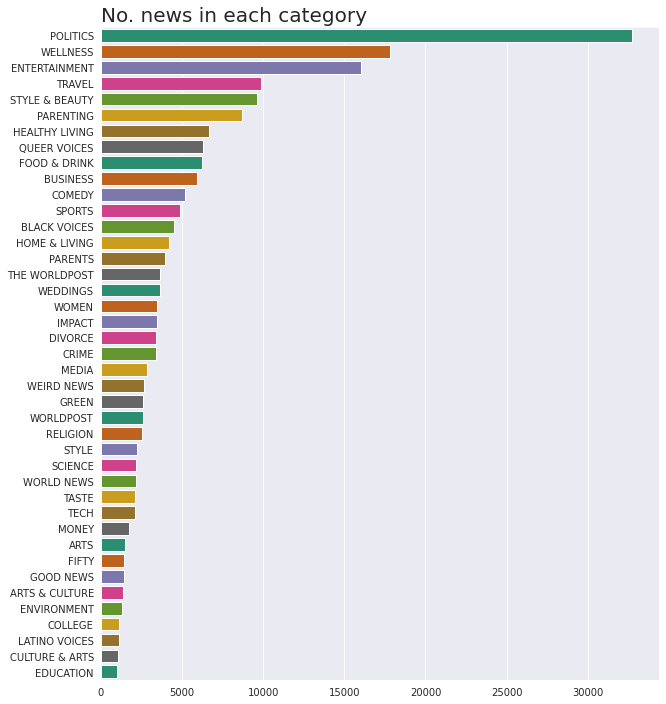

In [824]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [826]:
#delete the categorys with less than 100 news
df = df[df['category'].isin(count_df[count_df['category'] > 3000]['index'])]

#rename the category COMEDY to ENTERTAINMENT
df.loc[df['category'] == 'COMEDY', 'category'] = 'ENTERTAINMENT'


#delete the category QUEER VOICES
df = df[df['category'] != 'QUEER VOICES']
df = df[df['category'] != 'BLACK VOICES']
df = df[df['category'] != 'WEDDINGS']
df = df[df['category'] != 'THE WORLDPOST']
df = df[df['category'] != 'PARENTS']
df = df[df['category'] != 'IMPACT']
df = df[df['category'] != 'WOMEN']
df = df[df['category'] != 'WELLNESS']
df = df[df['category'] != 'DIVORCE']




There are 11 news categories


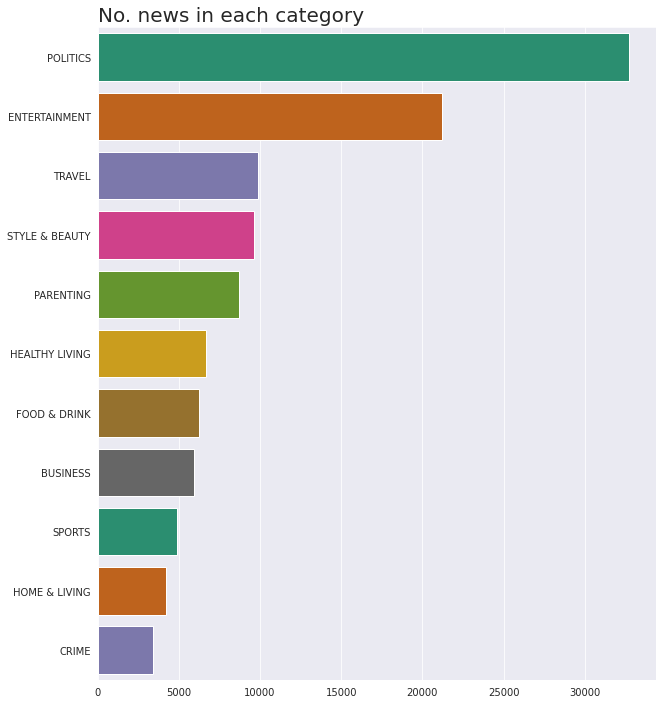

In [827]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [764]:
#get the number o news in each category
print(df['category'].value_counts())

POLITICS          32739
ENTERTAINMENT     21233
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
FOOD & DRINK       6226
BUSINESS           5937
SPORTS             4884
HOME & LIVING      4195
CRIME              3405
Name: category, dtype: int64


In [765]:
df = df.groupby('category').apply(lambda x: x.sample(3405))

There are 11 news categories


Text(0, 0.5, '')

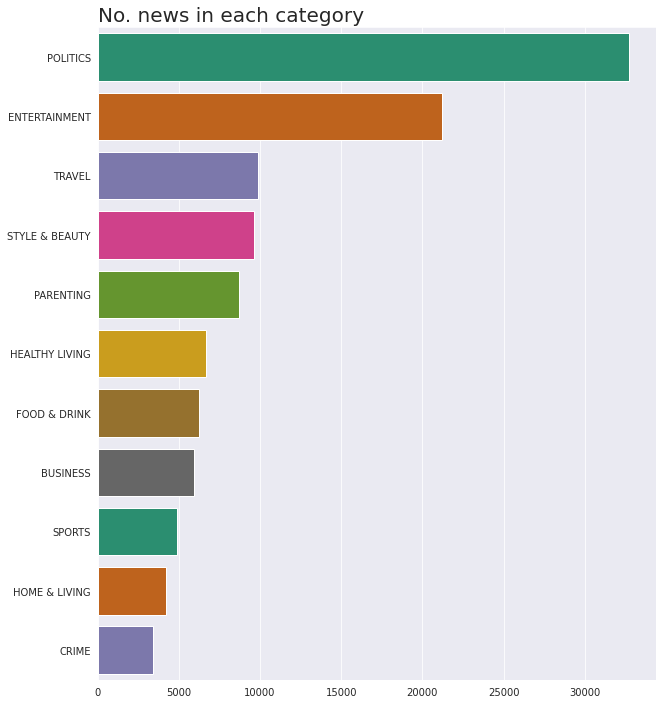

In [828]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")

In [829]:
# container for dfs
dfs = []

# loop through each category and get 1004 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(1004))
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

,category,headline,authors,link,short_description,date
0,TRAVEL,Rick Steves' Road Trip: Exploring Native America,"Rick Steves, Contributor\nContributor",https://www.huffingtonpost.com/entry/rick-stev...,I love the way the big cities of the Great Pla...,2012-03-14
1,BUSINESS,The World's Favorite New Tax Haven Is The Unit...,,https://www.huffingtonpost.comhttp://www.bloom...,Moving money out of the usual offshore secrecy...,2016-01-27
2,STYLE & BEAUTY,10 Signs You're Getting Addicted To Blowouts,,https://www.huffingtonpost.com/entry/addicted-...,You've figured out how to make a blowout last ...,2013-11-15
3,FOOD & DRINK,10 Things to Do With a Can of Tomatoes,"Food52, Contributor\nfood52.com",https://www.huffingtonpost.com/entry/10-things...,With a can of tomatoes -- or a stack of them -...,2013-05-14
4,CRIME,"Man Fatally Shot Outside Courthouse, Suspect '...",,https://www.huffingtonpost.com/entry/man-fatal...,"""I don't know what happened.""",2015-08-03


In [830]:
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [831]:
# apply preprocessing steps

df['headline'] = df['headline'].str.lower() +" "+ df['short_description'].str.lower()
df['headline'] = df['headline'].apply(alpha_num)
df['headline'] = df['headline'].apply(remove_stopwords)

df.head()

,category,headline,authors,link,short_description,date
0,TRAVEL,rick steves road trip exploring native america...,"Rick Steves, Contributor\nContributor",https://www.huffingtonpost.com/entry/rick-stev...,I love the way the big cities of the Great Pla...,2012-03-14
1,BUSINESS,worlds favorite new tax haven united states mo...,,https://www.huffingtonpost.comhttp://www.bloom...,Moving money out of the usual offshore secrecy...,2016-01-27
2,STYLE & BEAUTY,10 signs youre getting addicted blowouts youve...,,https://www.huffingtonpost.com/entry/addicted-...,You've figured out how to make a blowout last ...,2013-11-15
3,FOOD & DRINK,10 things can tomatoes can tomatoes stack pant...,"Food52, Contributor\nfood52.com",https://www.huffingtonpost.com/entry/10-things...,With a can of tomatoes -- or a stack of them -...,2013-05-14
4,CRIME,man fatally shot outside courthouse suspect go...,,https://www.huffingtonpost.com/entry/man-fatal...,"""I don't know what happened.""",2015-08-03


In [832]:
# unique news category
df['category'].unique()

array(['TRAVEL', 'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'CRIME',
       'SPORTS', 'POLITICS', 'HOME & LIVING', 'ENTERTAINMENT',
       'PARENTING', 'HEALTHY LIVING'], dtype=object)

In [833]:
# container for sentences
news = np.array([headline for headline in df['headline']])

# container for labels
labels = np.array([label for label in df['category']])

In [834]:
# Label encoding news category
enc = LabelEncoder()
labels = enc.fit_transform(labels)
# print(enc.classes_)

In [835]:
# parameters

vocab_size = 10000
embedding_dim = 16
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [836]:
# train-test split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(news, labels, 
                                                                                          test_size=0.20, 
                                                                                          stratify=labels)

In [837]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [851]:
# model initialization
from keras import metrics 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 128, 16)           160000    
                                                                 
 bidirectional_21 (Bidirecti  (None, 128)              41472     
 onal)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_74 (Dense)            (None, 24)                3096      
                                                                 
 dense_75 (Dense)            (None, 11)                275       
                                                                 
Total params: 204,843
Trainable params: 204,843
Non-trainable params: 0
_______________________________________________

In [852]:
# fit model
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.20)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/10


ValueError: in user code:

    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 11) are incompatible


KeyError: 'accuracy'

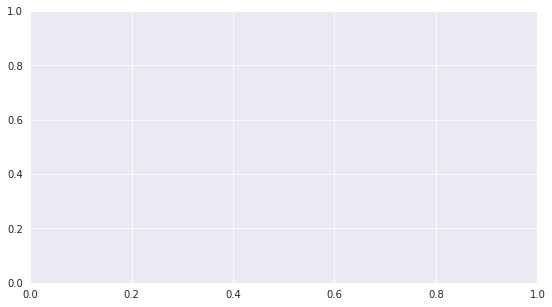

In [846]:
plot_history(history)

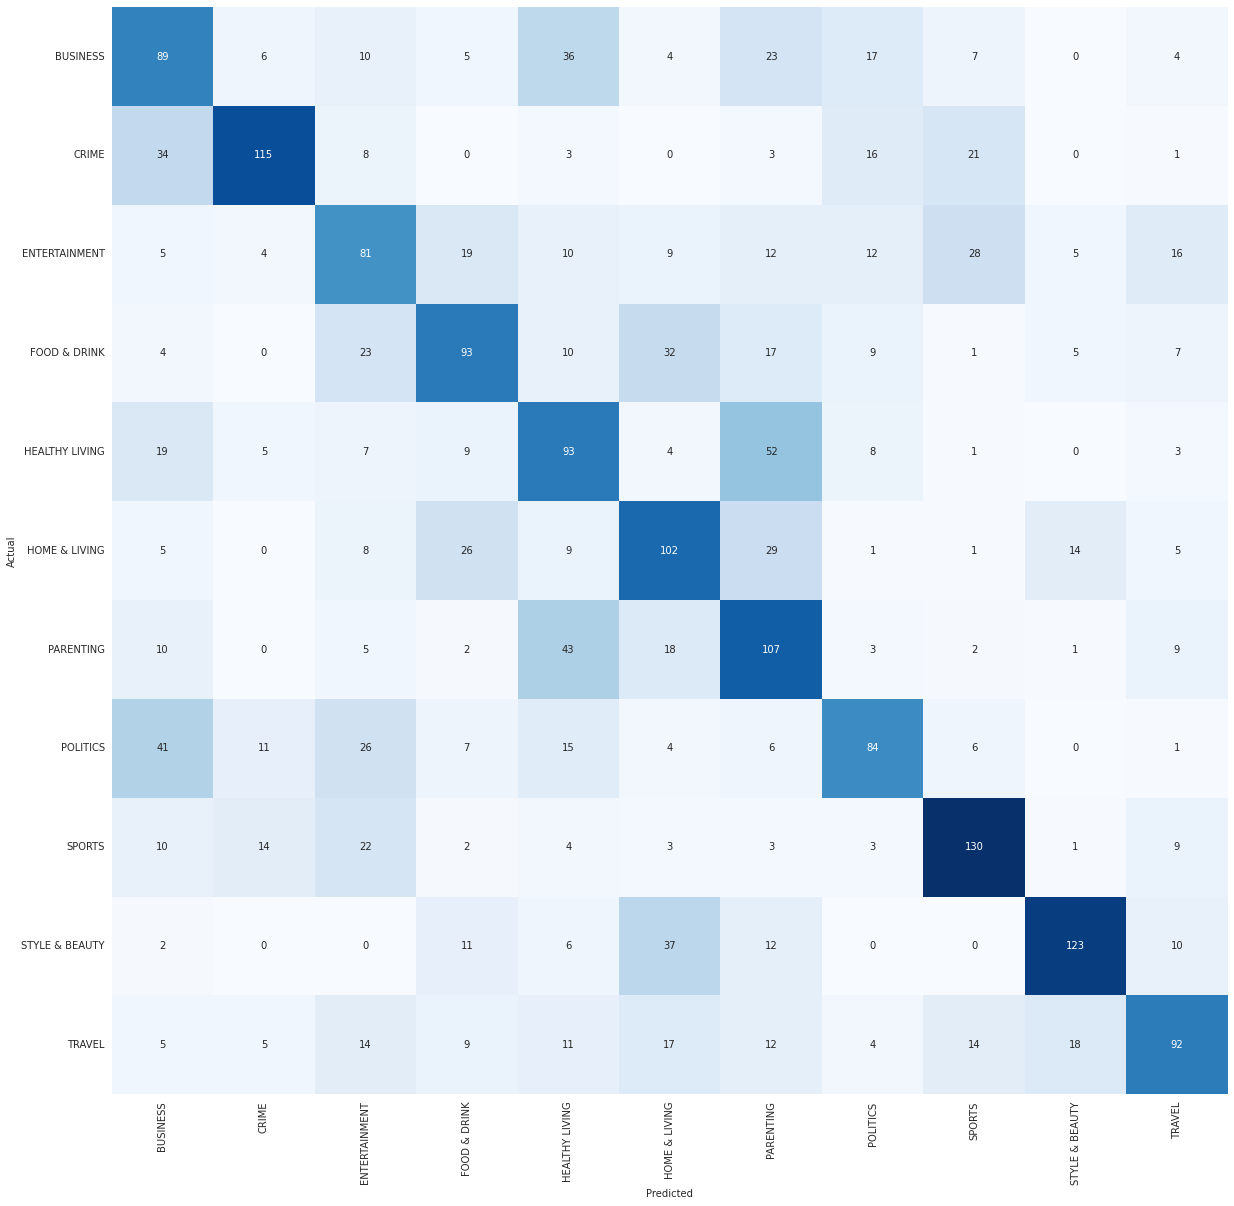

In [847]:
plot_cm(pred, enc.classes_, 20)

In [848]:
sentence = ["The BBC correspondent, who was diagnosed with PTSD in 2008, explores the effects of the condition and how it can be treated", 
            "Kaepernick has been attempting an NFL comeback since 2016 but has not convinced a team to sign him. He hasn’t played a snap of football since the season he launched a protest against racial injustice during the national anthem."]

##apllying preprocessing steps
sentence = [s.lower() for s in sentence]
sentence = [alpha_num(s) for s in sentence]
sentence = [remove_stopwords(s) for s in sentence]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

# get the biggest value from the prediction
pred = np.argmax(model.predict(padded), axis=1)
print(pred)
for i in pred:
    print(enc.classes_[i])


[[7.4248474e-06 1.3030384e-10 1.1851849e-08 3.7002912e-06 2.3649986e-01
  9.1296844e-03 7.5423521e-01 7.6737467e-07 4.1955163e-13 1.0377293e-04
  1.9592431e-05]
 [5.9498024e-09 4.5942879e-04 1.7050107e-04 2.6361745e-12 7.9660480e-12
  6.4322594e-18 1.0912780e-20 4.0969120e-08 9.9937004e-01 3.2937268e-15
  4.4688466e-08]]
[6 8]
PARENTING
SPORTS


In [843]:
model.evaluate(validation_padded, validation_labels)

70/70 [==============================] - 1s 14ms/step - loss: 2.7470 - accuracy: 0.5428


[2.746955394744873, 0.5427795648574829]